In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

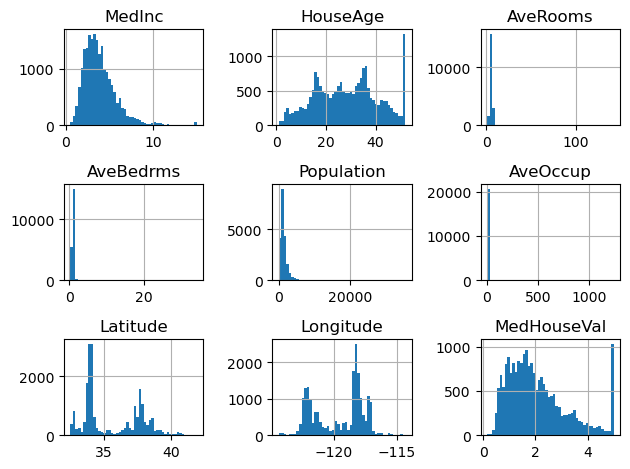

In [2]:
CH=fetch_california_housing()
df_california=pd.DataFrame(CH.data,columns=CH.feature_names)
df_california[CH.target_names[0]]=CH.target
df_california.hist(bins=50)
plt.tight_layout()

# Función logaritmo
$$
X'=\mathrm{log}(X),
$$
para $X\in[1,\infty)$.

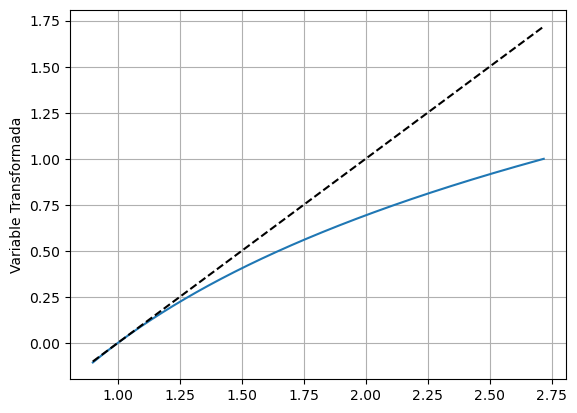

In [3]:
x=np.linspace(0.9,np.e,1000) # Regresa 1000 valores equidistantes entre 0.9 y 10
xp=np.log(x)
plt.plot(x, xp)
plt.plot(x,x-1,'--k')
plt.ylabel('Variable Transformada')
plt.grid()

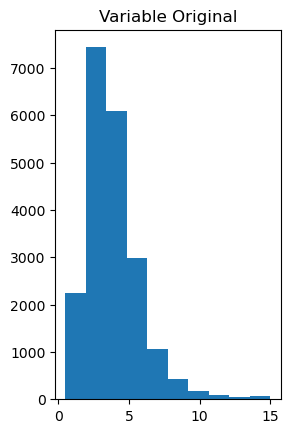

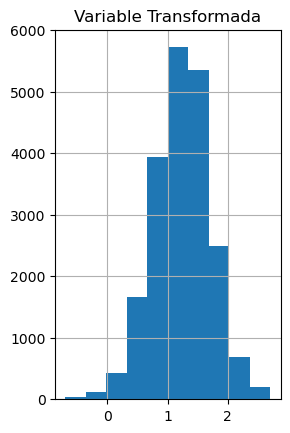

In [4]:
X=df_california['MedInc'] # Transformemos esta variable
X_log=np.log(X)

fig=plt.figure()
ax=fig.add_subplot(121)
ax.hist(X)
ax.set_title('Variable Original')
fig=plt.figure()
ax=fig.add_subplot(122)
ax.hist(X_log)
ax.set_title('Variable Transformada')
plt.grid()

In [5]:
# Sesgos
X.skew(),X_log.skew()

(1.6466567021344465, -0.14608181157738848)

In [6]:
df_california_log=np.log(df_california-df_california.min()+1) # Necesitamos que los valores inicien de 1
df_california_log.skew()

MedInc         0.078282
HouseAge      -1.289170
AveRooms       0.959245
AveBedrms      8.298256
Population    -1.140433
AveOccup       2.662098
Latitude      -0.080214
Longitude     -0.745362
MedHouseVal    0.237146
dtype: float64

In [7]:
df_california.skew()

MedInc          1.646657
HouseAge        0.060331
AveRooms       20.697869
AveBedrms      31.316956
Population      4.935858
AveOccup       97.639561
Latitude        0.465953
Longitude      -0.297801
MedHouseVal     0.977763
dtype: float64

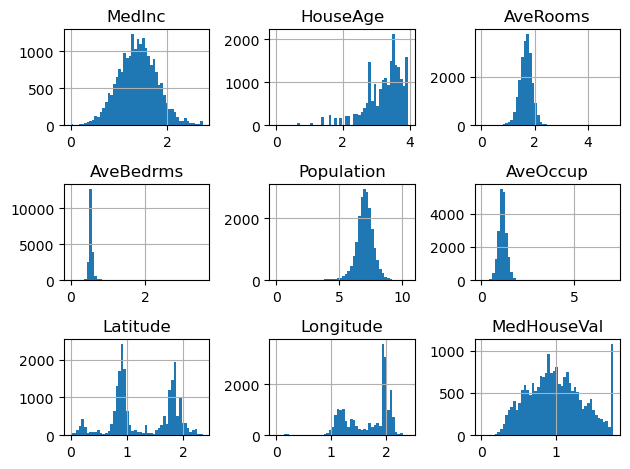

In [8]:
df_california_log.hist(bins=50)
plt.tight_layout()

# Funcion reciproca
$$
X'=\frac{1}{X},
$$
para $X\in[1,\infty)$.


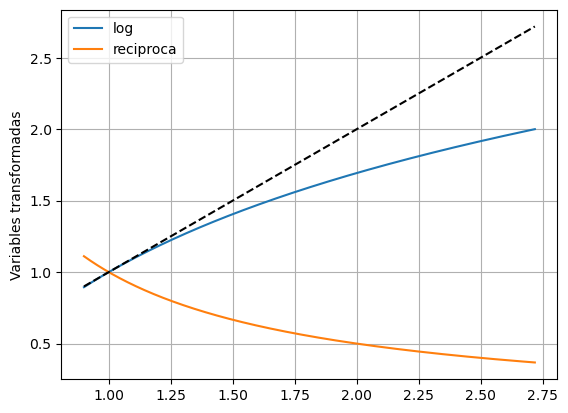

In [9]:
# Graficacion

plt.plot(x,np.log(x)+1,label='log')
plt.plot(x,1/x,label='reciproca')
plt.plot(x,x,'--k')
plt.legend()
plt.ylabel('Variables transformadas')
plt.grid()

In [10]:
df_desplazada=df_california-df_california.min()+1 # Necesitamos la desplazación a los positivos para compensar solo el sesgo positivo
df_california_recip=np.reciprocal(df_desplazada) # 1/df_california
df_california_recip.skew()

MedInc          1.329928
HouseAge        5.719626
AveRooms        1.864921
AveBedrms      -3.911728
Population     80.838678
AveOccup        0.612341
Latitude        1.097306
Longitude       2.185543
MedHouseVal     0.507905
dtype: float64

In [11]:
df_california_log.skew()

MedInc         0.078282
HouseAge      -1.289170
AveRooms       0.959245
AveBedrms      8.298256
Population    -1.140433
AveOccup       2.662098
Latitude      -0.080214
Longitude     -0.745362
MedHouseVal    0.237146
dtype: float64

In [12]:
# Decidimos entre funciones para conseguir el mejor sesgo
for log,recip in zip(df_california_log.skew(),df_california_recip.skew()):
  sesgos=[log,recip]
  minimo=np.argmin(sesgos)
  print(minimo,sesgos[minimo])

0 0.07828238577308295
0 -1.2891698416719752
0 0.9592453656885894
1 -3.911727799127492
0 -1.140432902075791
1 0.6123406072380883
0 -0.08021367912553705
0 -0.7453624105179477
0 0.23714570171725022


In [13]:
df_california_transformado=df_california.copy()
for var in df_california:
  log=df_california_log[var].skew()
  recip=df_california_recip[var].skew()
  sesgos=[log,recip]
  minimo=np.argmin(np.abs(sesgos))
  df_california_transformado[var]=[df_california_log[var],
                                  df_california_recip[var]][minimo]
df_california_transformado.skew()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.177623,3.713572,1.965429,0.591549,5.768321,0.349254,1.846879,1.137833,1.681946
1,2.174922,3.044522,1.855045,0.610297,7.782807,0.413645,1.843719,1.141033,1.489530
2,2.048660,3.951244,2.133217,0.574675,6.202536,0.321548,1.842136,1.134623,1.474994
3,1.815346,3.951244,1.786948,0.574803,6.320768,0.350185,1.842136,1.131402,1.449975
4,1.469325,3.951244,1.861861,0.572165,6.333280,0.401742,1.842136,1.131402,1.452084
...,...,...,...,...,...,...,...,...,...
20635,0.722900,3.218876,1.648524,0.555556,6.736967,0.348639,2.071913,1.449269,0.489199
20636,1.117401,2.890372,1.835438,0.504425,5.869297,0.291503,2.073172,1.420696,0.483049
20637,0.788503,2.833213,1.678850,0.559673,6.912743,0.379748,2.065596,1.418277,0.572679
20638,0.861750,2.890372,1.701718,0.543896,6.605298,0.411370,2.065596,1.393766,0.528868
